In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

import utils

In [2]:
SEED = 42

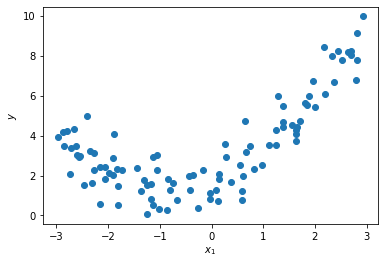

In [3]:
np.random.seed(SEED)
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x ** 2 + x + 2 + np.random.randn(m, 1)
utils.plot_xy(x, y)

In [4]:
x[:3]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365]])

In [5]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x_poly[:3]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281]])

lin_reg.intercept_ = [1.78134581], lin_reg.coef_ = [[0.93366893 0.56456263]]


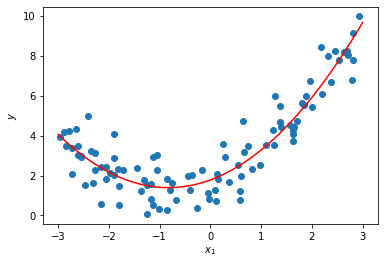

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

lin_reg.intercept_, lin_reg.coef_
print(f"lin_reg.intercept_ = {lin_reg.intercept_}, lin_reg.coef_ = {lin_reg.coef_}")

x_new = np.linspace(-3, 3, 100).reshape(100, 1)
x_new_poly = poly_features.transform(x_new)
y_new = lin_reg.predict(x_new_poly)

plt.plot(x_new, y_new, 'r-')
utils.plot_xy(x, y)

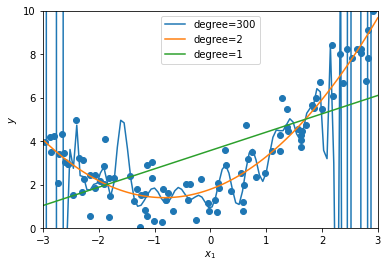

In [7]:
models = [
    ('degree=300', Pipeline([
        ('poly_features', PolynomialFeatures(degree=300, include_bias=False)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression()),
    ])),
    ('degree=2', Pipeline([
        ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression()),
    ])),
    ('degree=1', Pipeline([
        ('poly_features', PolynomialFeatures(degree=1, include_bias=False)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression()),
    ])),
]
utils.plot_models(x, y, models, [-3, 3, 0, 10])

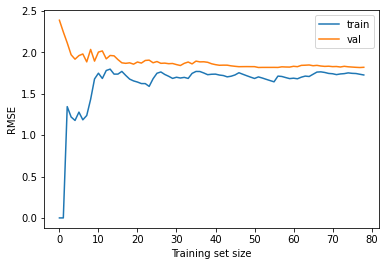

In [8]:
utils.plot_learning_curves(x, y, LinearRegression())

(0.0, 80.0, 0.0, 3.0)

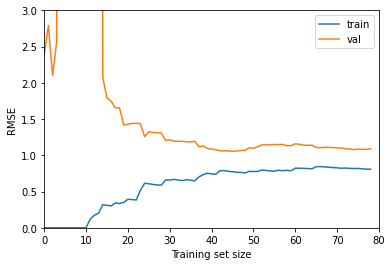

In [9]:
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

utils.plot_learning_curves(x, y, polynomial_regression)
plt.axis([0, 80, 0, 3]) 